In [1]:
import torch
import os

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from bliss.models.galaxy_flow import CenteredGalaxyLatentFlow
from bliss.models.galaxy_net import OneCenteredGalaxyAE

In [2]:

os.chdir("../..")

In [3]:
#galaxy_ae = OneCenteredGalaxyAE.load_from_checkpoint("./models/sdss_autoencoder.ckpt")
galaxy_ae = OneCenteredGalaxyAE.load_from_checkpoint("./output/new_autoencoder/default/vae_dim16_noisier_wn/checkpoints/epoch=1029-val_loss=876196.500.ckpt")

In [4]:
from matplotlib import pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
n_samples = 24
images = galaxy_ae.sample(n_samples)

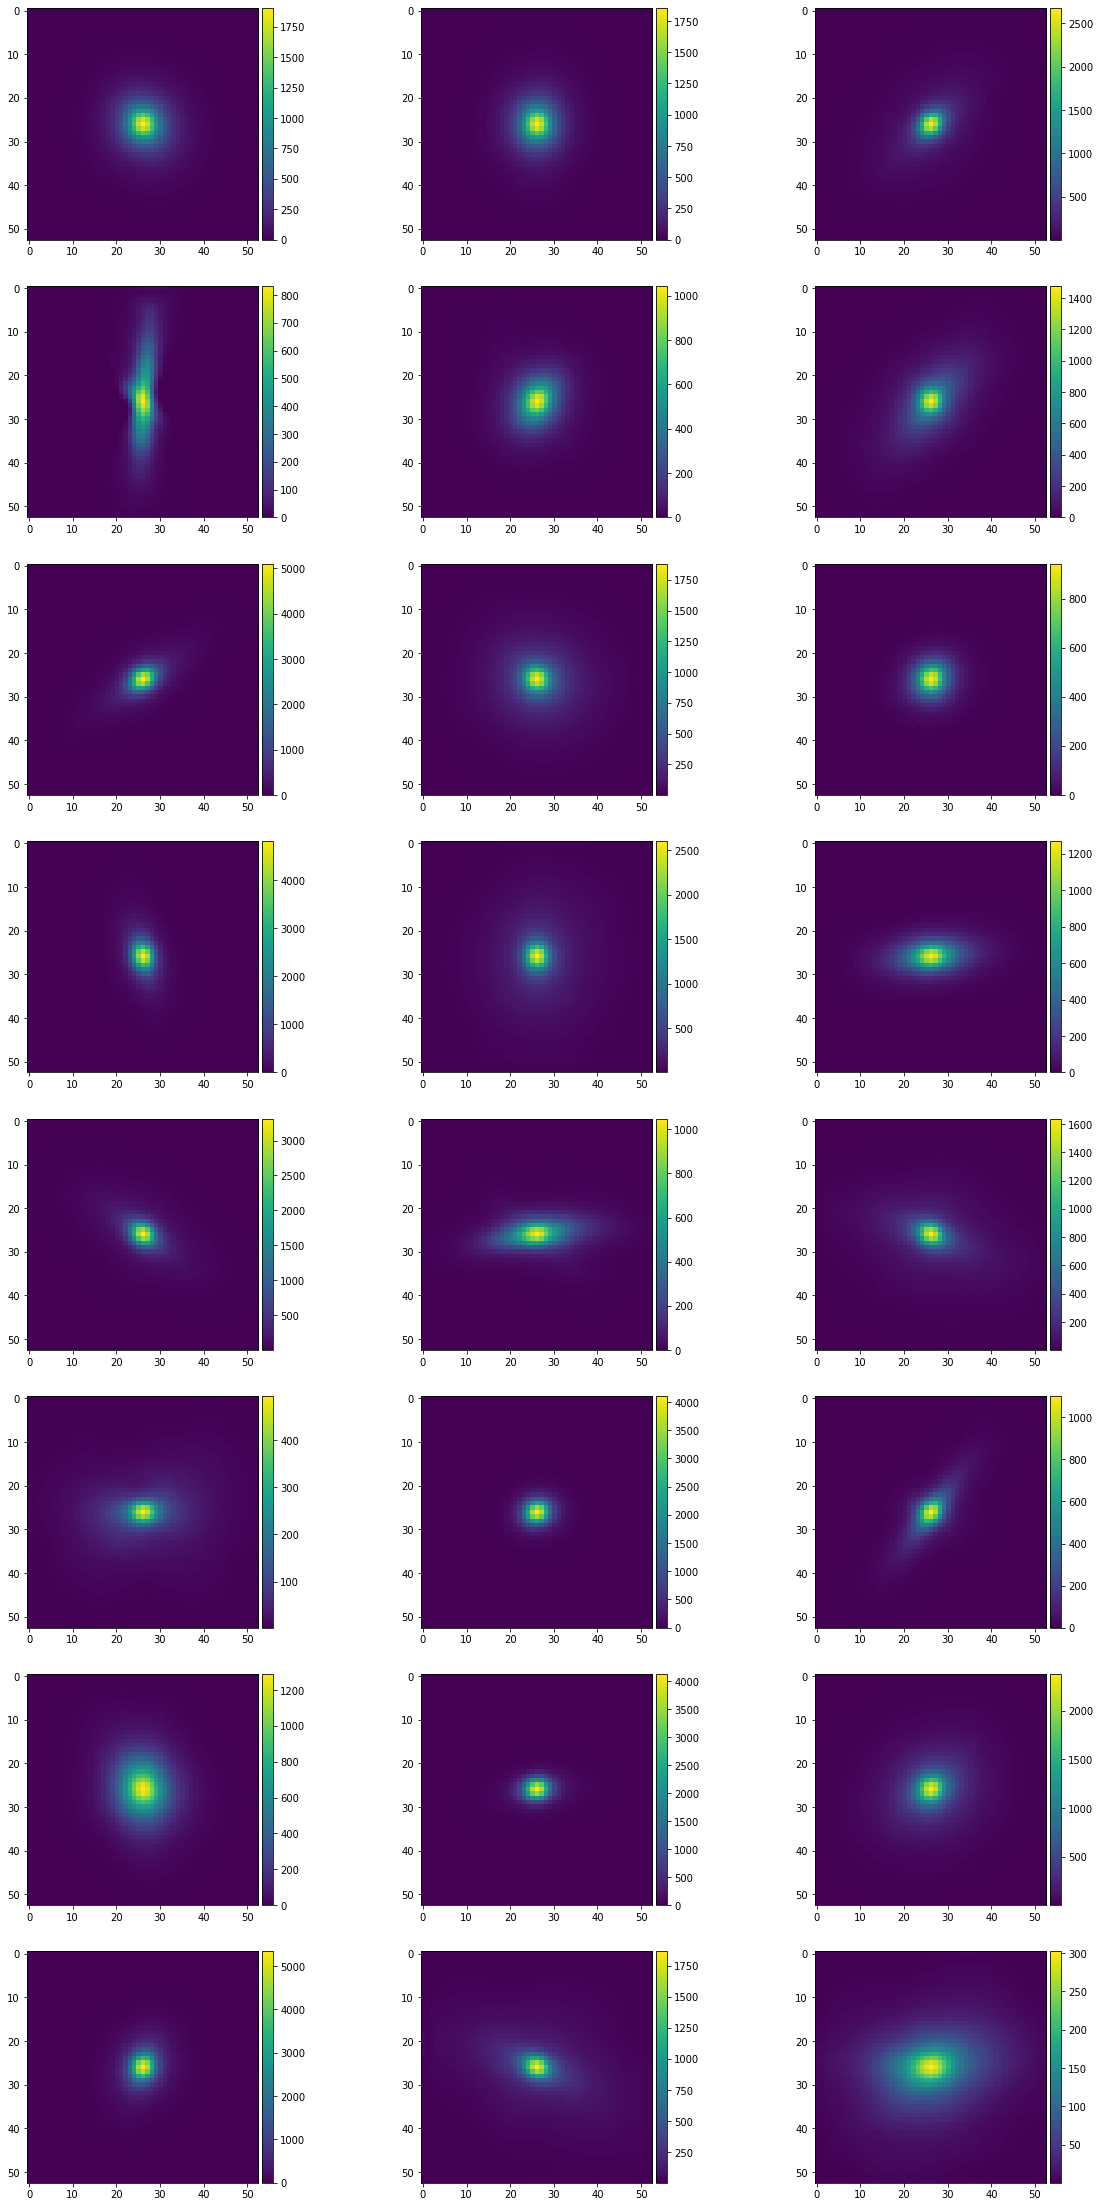

In [6]:
%matplotlib inline
fig, axes = plt.subplots(nrows=n_samples//3, ncols=3, figsize=(20, 20 * (n_samples//12)))
for (i, ax) in enumerate(axes.flatten()):
    im = ax.imshow(images[i, 0].detach().numpy())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #im = ax.matshow(image, vmin=vmin, vmax=vmax)
    fig.colorbar(im, cax=cax, orientation="vertical")
#plt.imshow(images[1,0].detach().numpy())

In [7]:
galaxy_ae.sample_latent(n_samples).shape

torch.Size([24, 16])

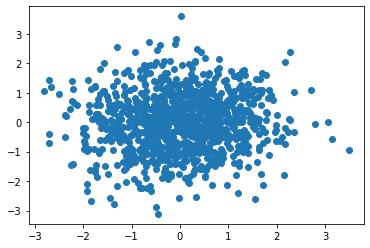

In [10]:
%matplotlib inline
samples = galaxy_ae.sample_latent(1000)
plt.scatter(samples[:, 0], samples[:, 1])

In [18]:
galaxy_flow = CenteredGalaxyLatentFlow.load_from_checkpoint("./models/sdss_autoencoder_flow.ckpt")

In [19]:
galaxy_ae.set_latent_flow(galaxy_flow.flow)

In [36]:
images = galaxy_ae.sample(n_samples)

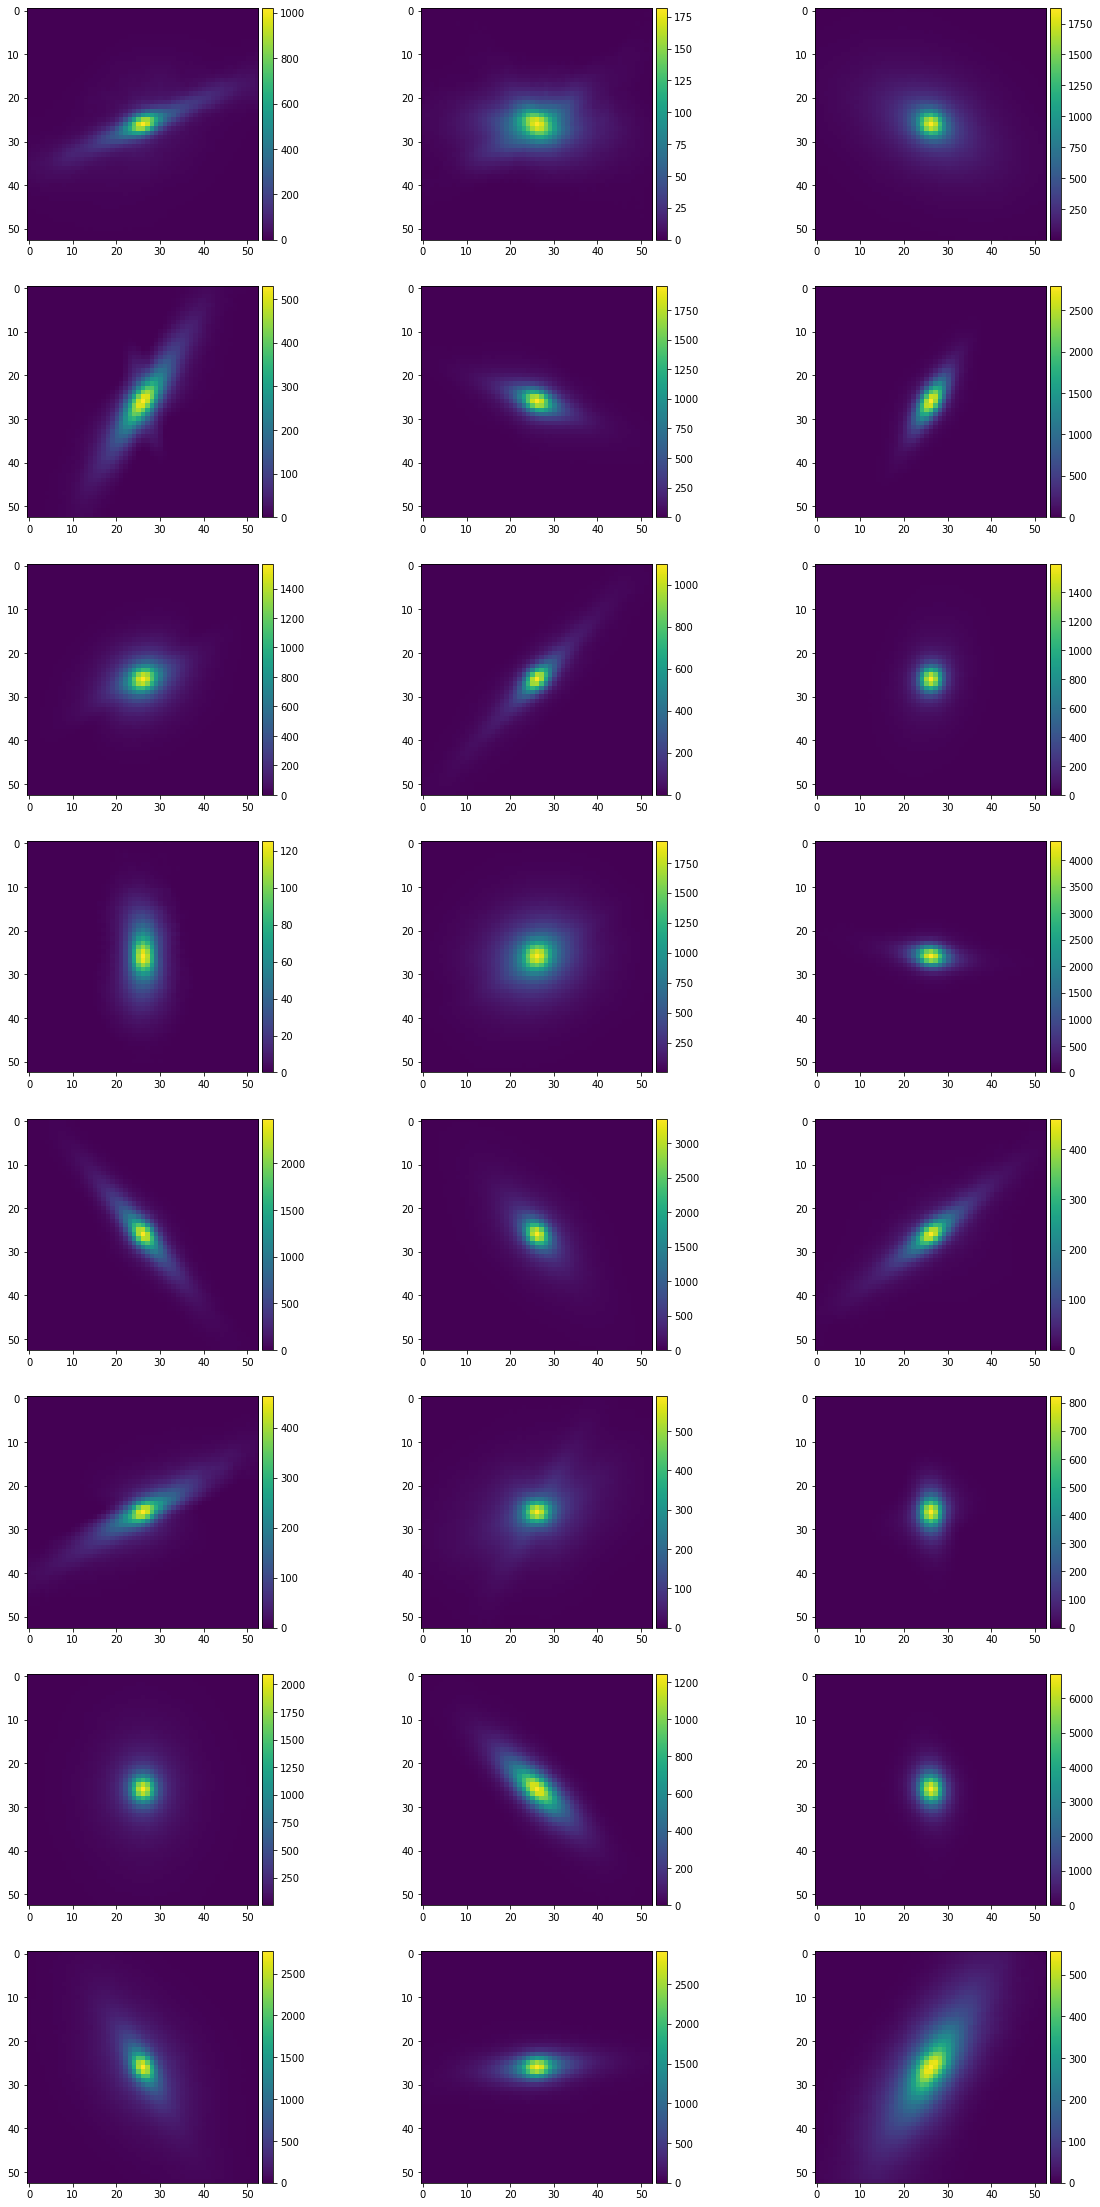

In [37]:
%matplotlib inline
fig, axes = plt.subplots(nrows=n_samples//3, ncols=3, figsize=(20, 20 * (n_samples//12)))
for (i, ax) in enumerate(axes.flatten()):
    im = ax.imshow(images[i, 0].detach().numpy())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #im = ax.matshow(image, vmin=vmin, vmax=vmax)
    fig.colorbar(im, cax=cax, orientation="vertical")
#plt.imshow(images[1,0].detach().numpy())